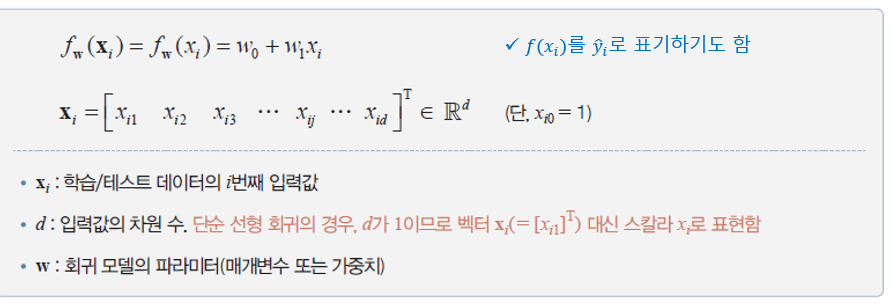

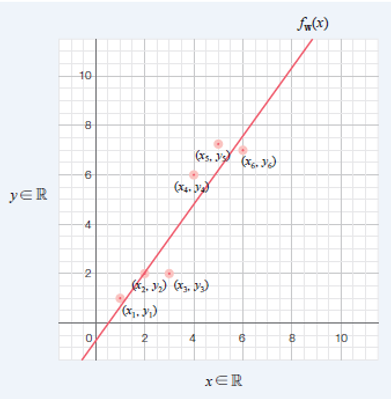

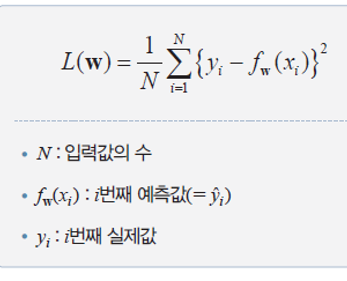

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # 데이터분리(학습용/테스트)
from sklearn.linear_model import LinearRegression # 모델 - 선형모델
from sklearn.metrics import mean_squared_error, r2_score # 평가

In [1]:
url = 'https://raw.githubusercontent.com/leeky20240624/pythone/main/2%EA%B0%9C%EC%9B%94/3%EC%A3%BC%EC%B0%A8/Salary_Data.csv'

In [4]:
# 데이터 불러오기
df = pd.read_csv(url)
# 데이터확인
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# 결측치여부 및 데이터 타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
# 모델객체 만들기
lr = LinearRegression()
# 학습하기
lr.fit(x_train,y_train)
w_1 = lr.coef_  # 선형계수
w_0 = lr.intercept_  # 절편
print("선형계수:",w_1)
print("절편:",w_0)
print("테스트의 첫번째 값을 예측",x_test.iloc[0,0]*w_1 + w_0)
y_predict = lr.predict(x_test)
print("모델이 예측한 테스트의 첫번째 값",y_predict[0])

선형계수: [9332.94473799]
절편: 25609.89799835482
테스트의 첫번째 값을 예측 [75074.50510972]
모델이 예측한 테스트의 첫번째 값 75074.50510971624


In [16]:
# 모델 성능평가
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_predict)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

mse: 51338023.49224842
rmse: 7165.055721503387
r2: 0.7616681465472094


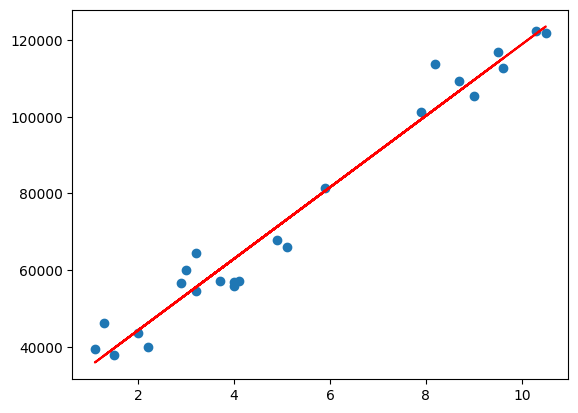

In [19]:
# 모델 동작을 시각화
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='red')
plt.show()